In [1]:
# These are css/html styles for good looking ipython notebooks
from IPython.core.display import HTML
index = open('style.html').read()
HTML('<html>{}</html>'.format(index))

# Sales Prediction

Our aim is to build a model which predicts sales based on the money spent on different platforms for marketing.

# Importing The Libraries

In [1]:
#Importing the libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data Pre Processing

### Missing Values

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The dataset does not have missing values

### Duplicate Rows

In [5]:
df.duplicated().any()

False

There are no duplicate rows present in the dataset

### Outliers

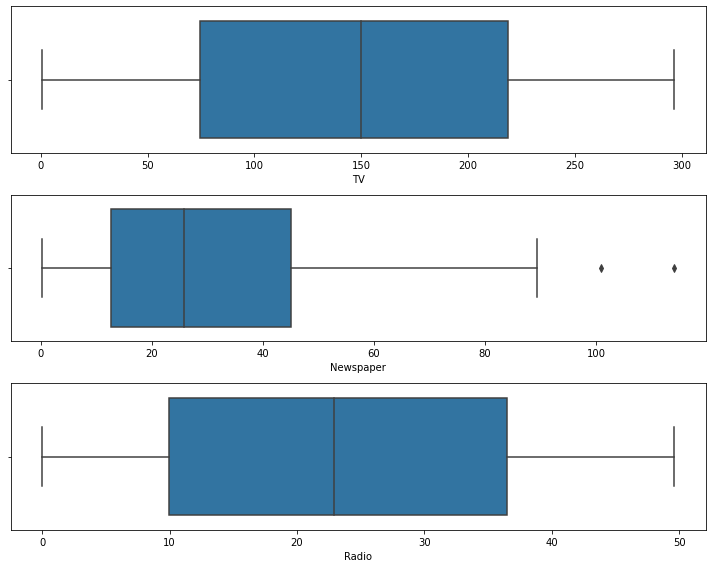

In [6]:
fig, axs = plt.subplots(3, figsize = (10,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout();

There are not that extreme values present in the dataset

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

### Distribution of the Target Variable

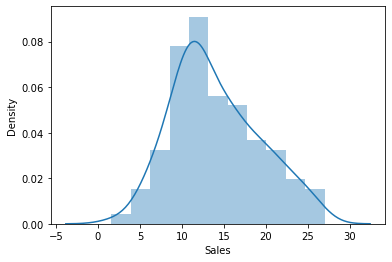

In [8]:
sns.distplot(df['Sales']);

It is normally distributed

### How Sales Are Related With Other Variables

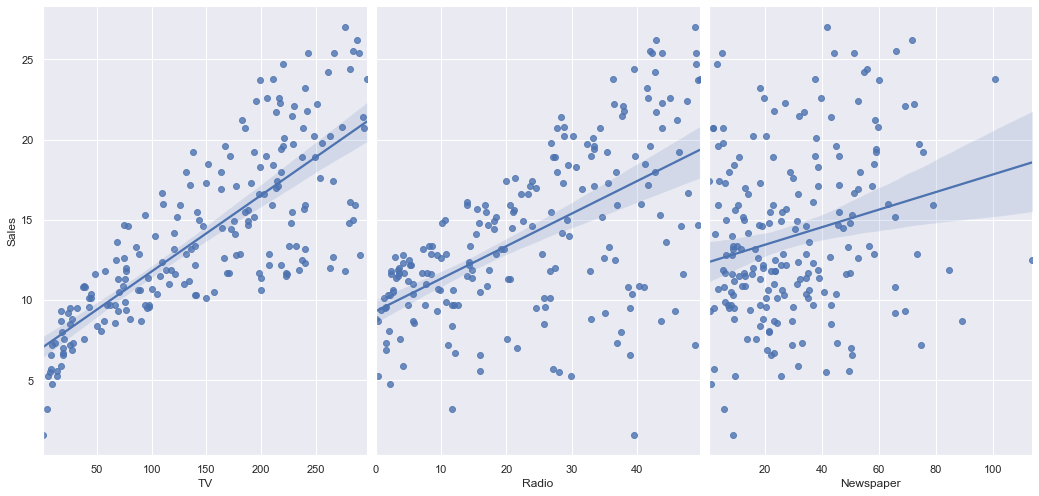

In [9]:
sns.set_theme(color_codes=True)

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind="reg");

TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated

### Heatmap

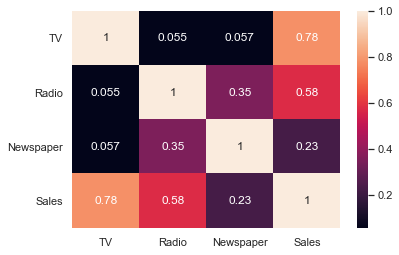

In [10]:
sns.heatmap(df.corr(), annot = True);

TV seems to be most correlated with Sales as 0.9 is very close to 1

# Multiple Linear Regression

In [11]:
# Setting the value for X and Y
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [12]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [14]:
# Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  2.7089490925159048
Coefficients:


[('TV', 0.04405928095746521),
 ('Radio', 0.1992874968989396),
 ('Newspaper', 0.006882452222275501)]

In [15]:
# Prediction of test set
y_pred_mlr = mlr.predict(x_test)

In [16]:
# Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


In [17]:
# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [18]:
#Predict for any value
mlr.predict([[56, 55, 67]])

array([16.59820545])

In [19]:
# Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))


pd.DataFrame(
{'Metrics': ['R squared:', 'Mean Absolute Error:', 'Mean Square Error:', 'Root Mean Square Error:'],
 'Scores': [mlr.score(x,y)*100, meanAbErr, meanSqErr, rootMeanSqErr]    
})

,Metrics,Scores
0,R squared:,89.387082
1,Mean Absolute Error:,1.511669
2,Mean Square Error:,3.796797
3,Root Mean Square Error:,1.948537


# Simple Linear Regression

In our data visualization, we saw sales were strongly linearly correlated by TV. The correlation seems to be decreasing towards radio and newspaper. So I wanted to see if we used only TV in Linear Regression (Simple Linear Regression) on our model would our success increase.

In [20]:
# Setting the value for X and Y
x = df[['TV']]
y = df['Sales']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [23]:
# Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  7.23945983075114
Coefficient: [0.0464078]


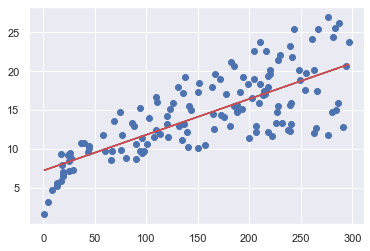

In [24]:
# Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.239 + 0.046*x_train, 'r');

In [25]:
# Prediction of test set
y_pred_slr= slr.predict(x_test)

In [26]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


In [27]:
# Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
95,16.9,14.817854
15,22.4,16.307544
30,21.4,20.832305
158,7.3,7.782431
128,24.7,17.463099
115,12.6,10.724686
69,22.3,17.300671
170,8.4,9.559850
174,11.5,17.560555
45,14.9,15.365466


In [28]:
# Predict for any value
slr.predict([[56]])

array([9.83829675])

In [29]:
# Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))


pd.DataFrame(
{'Metrics': ['R squared:', 'Mean Absolute Error:', 'Mean Square Error:', 'Root Mean Square Error:'],
 'Scores': [slr.score(x,y)*100, meanAbErr, meanSqErr, rootMeanSqErr]    
})


,Metrics,Scores
0,R squared:,61.146831
1,Mean Absolute Error:,2.275881
2,Mean Square Error:,8.970991
3,Root Mean Square Error:,2.995161


 It seems like Multiple Linear Regression produces a better model.